# Kanerva's Figure 1.2 (page 25)

In [1]:
import sdm as sdmlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [2]:
bits = 1000
sample = 1000000

address_space = sdmlib.AddressSpace.init_random(bits, sample)

In [3]:
def calculate_probabilities():
    from math import factorial
    comb = lambda a, b: factorial(a)/factorial(b)/factorial(a-b)
    acc = [0]
    for i in xrange(1001):
        acc.append(acc[-1] + comb(1000, i))
    x = range(0, 1001)
    y = [acc[i]/float(2**1000) for i in xrange(1001)]
    return x, y

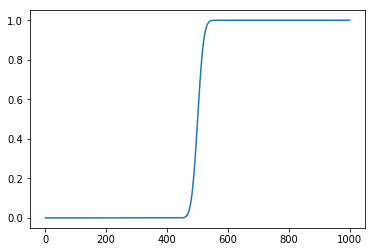

In [4]:
x, y = calculate_probabilities()
plt.plot(x, y);

In [5]:
def run(radius):
    x = range(0, 1001)
    y = []
    for i, dist in enumerate(x):
        clear_output(wait=True)
        print 'Distance: {:4d} ({:.2f}%)'.format(dist, 100.*(i+1)/len(x))
        
        b1 = sdmlib.Bitstring.init_random(bits)
        b2 = sdmlib.Bitstring.init_from_bitstring(b1)
        b2.flip_random_bits(dist)
        assert b1.distance_to(b2) == dist
    
        h1 = set(address_space.scan_thread(b1, radius, 4))
        h2 = set(address_space.scan_thread(b2, radius, 4))
        
        y.append(len(h1&h2))
    return x, y

In [6]:
v = []

In [7]:
v.append((451, run(451)))

Distance: 1000 (100.00%)


In [10]:
v.append((480, run(480)))

Distance: 1000 (100.00%)


In [9]:
v.append((500, run(500)))

Distance: 1000 (100.00%)


/Library/Python/2.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Library/Python/2.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  # This is added back by InteractiveShellApp.init_path()


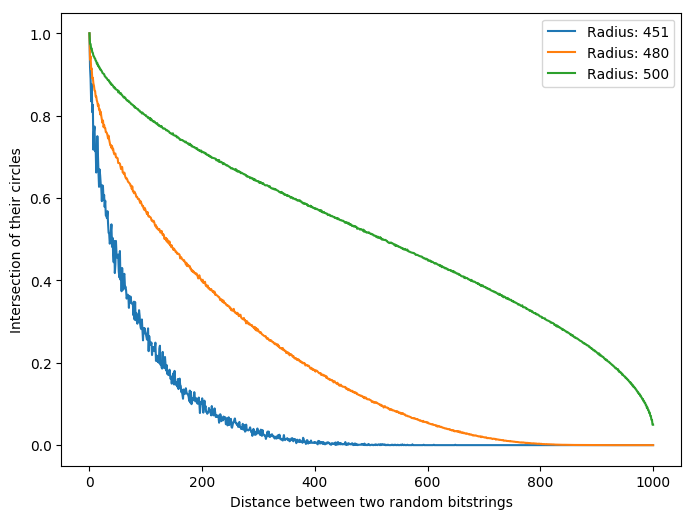

In [14]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hold(True)
for d, points in v[:-1]:
    x, y = points
    ymax = max(y)
    y = [float(a)/ymax for a in y]
    plt.plot(x, y, label='Radius: {}'.format(d))
plt.xlabel('Distance between two random bitstrings')
plt.ylabel('Intersection of their circles')
plt.legend()
plt.hold(False)